In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import utils
import numpy as np

In [3]:
data=pd.read_excel('data.xlsx')

In [4]:
data

,ID,Height (feet),Age,Weight
0,1,5.00,45,77
1,2,5.11,26,47
2,3,5.60,30,55
3,4,5.90,34,59
4,5,4.80,40,72
5,6,5.80,36,60
6,7,5.30,19,40
7,8,5.80,28,60
8,9,5.50,23,45
9,10,5.60,32,58


Replacing the ? marks for the same value above


In [5]:
data['Weight'].replace('?', inplace=True)


/tmp/ipykernel_32901/803157961.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  data['Weight'].replace('?', inplace=True)
/tmp/ipykernel_32901/803157961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weight'].replace('?', inplace=True)


Value changed


In [6]:
data

,ID,Height (feet),Age,Weight
0,1,5.00,45,77
1,2,5.11,26,47
2,3,5.60,30,55
3,4,5.90,34,59
4,5,4.80,40,72
5,6,5.80,36,60
6,7,5.30,19,40
7,8,5.80,28,60
8,9,5.50,23,45
9,10,5.60,32,58


In [7]:
features=['ID','Height (feet)','Age']

Spliting the data y=value to predict


In [8]:
X = data.loc[:,features]
y = data.loc[:, 'Weight']

Preprocessing the y value


In [9]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [10]:
list_of_tuples = list(zip(y, y_transformed))


Normal weight value vs weight value preprocessed


In [11]:
comparative_table = pd.DataFrame(list_of_tuples, columns=['Weight','Weight Converted'])
comparative_table


,Weight,Weight Converted
0,77,8
1,47,2
2,55,3
3,59,5
4,72,7
5,60,6
6,40,0
7,60,6
8,45,1
9,58,4


Splitting the data training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y_transformed, test_size = 0.2, random_state=42)

Applying knn algorithm

In [13]:
knn = KNeighborsClassifier(n_neighbors=5) 


In [14]:
knn.fit(X_train, y_train) 


KNeighborsClassifier()

Prediction made using the values from the row where the weight is missing


In [16]:
print(knn.predict([[11,5.50,38]]))
comparative_table


[3]


/home/mps/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Weight,Weight Converted
0,77,8
1,47,2
2,55,3
3,59,5
4,72,7
5,60,6
6,40,0
7,60,6
8,45,1
9,58,4


Following the result and the table below, using the values
ID=11 Height=5.50 Age=38 the weight will be 3=55

Text(0, 0.5, 'Accuracy')

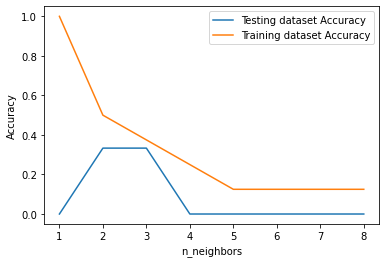

In [17]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
